# Project : Crimes in India

# Phase 2: State/UT wise analysis.

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [17]:
## Featch Data from India_Area_LiteracyRate_Population.csv generated in Phase-1

df1 = pd.read_csv('India_Area_LiteracyRate_Population.csv')
df1.head()

,Unnamed: 0,States/UT,Area (sq. km),Literacy Rate 1951,Literacy Rate 1961,Literacy Rate 1971,Literacy Rate 1981,Literacy Rate 1991,Literacy Rate 2001,Literacy Rate 2011,States & Union Territories,Literact Rate 2023,Population (1951 Census)[11],Population (1961 Census)[11],Population (1971 Census)[11],Population (1981 Census)[11],Population (1991 Census)[11],Population (2001 Census)[11],Population (2011 Census)[11],Population 2023
0,0,Andaman & Nicobar,8249,30.3,40.07,51.15,63.19,73.02,81.30,86.63,A&N islands,86.27,31480.0,64160.0,115874.0,189496.0,281990.0,356650.0,379944,403000
1,1,Andhra Pradesh,162968,-,21.19,24.57,35.66,44.08,60.47,67.02,Andhra Pradesh,66.40,31115000.0,35983480.0,43502710.0,53551030.0,66508170.0,75728400.0,49386799,53156000
2,2,Arunachal Pradesh,83743,NaN,7.13,11.29,25.55,41.59,54.34,65.38,Arunachal Pradesh,66.95,NaN,337300.0,468885.0,632502.0,865900.0,1098328.0,1382611,1562000
3,3,Assam,78438,18.53,32.95,33.94,NaN,52.89,63.25,72.19,Assam,85.90,8029100.0,10837700.0,14625157.0,18041250.0,22414320.0,26638600.0,31169272,35713000
4,4,Bihar,94163,13.49,21.95,23.17,32.32,37.49,47.00,61.80,Bihar,70.90,29085900.0,34841490.0,42126800.0,52303000.0,64531200.0,82879910.0,103804630,126756000


Total Crimes Dataset has generated with form year 2000 to 2020,

Ref: https://ncrb.gov.in/en/crime-in-india-table-addtional-table-and-chapter-contents 

In [18]:
#Read data from specified excel

total_crime_df = pd.read_excel(r"C:\Users\NEHA DESAI\Total Crime Data Year Wise.xlsx", sheet_name='Sheet1')
total_crime_df

,Sr.,State/UT,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1.0,Andhra Pradesh,655616,649964,620223,611614,666213,776055,887033,426104,...,247757,265705,139882,126448,129389,148002,144703,145751,238105,-
1,2.0,Arunachal Pradesh,2398,2280,2111,2357,2377,2363,2342,2444,...,2504,2918,3038,3149,2700,2746,2817,2877,2503,-
2,3.0,Assam,39237,38719,39828,43662,44073,46996,49113,55640,...,79656,89572,97401,107465,107014,109952,120573,132783,121609,-
3,4.0,Bihar,96510,102714,100203,117273,107664,109824,118899,132545,...,160271,184961,195040,195412,189696,236055,262815,269109,257512,-
4,5.0,Chhattisgarh,166272,178293,231516,185399,279435,187250,246734,298277,...,318615,289819,343811,301915,84192,90516,98233,96561,103173,-
5,6.0,Goa,4292,4432,5348,6897,6114,6162,5732,5155,...,5937,7512,7472,4556,3706,3943,3884,3727,4366,-
6,7.0,Gujarat,264482,263702,264458,273113,287750,292057,317946,324123,...,362649,413236,422299,434043,435422,334799,393194,431066,699619,-
7,8.0,Haryana,63786,68067,66437,64263,65264,72730,71123,78499,...,92213,121243,115469,131989,143111,224816,191229,166336,192395,-
8,9.0,Himachal Pradesh,15515,16408,16431,17029,16836,18096,17887,18043,...,15937,15733,17122,17221,17249,17796,19594,19924,20630,-
9,10.0,Jammu & Kashmir,22502,22841,24235,23829,22850,23603,23825,22549,...,26558,26907,25453,25310,26624,25608,27276,25408,28911,-


In [19]:
total_crime_df.drop(columns='Sr.',inplace=True)
total_crime_df

,State/UT,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Andhra Pradesh,655616,649964,620223,611614,666213,776055,887033,426104,650566,...,247757,265705,139882,126448,129389,148002,144703,145751,238105,-
1,Arunachal Pradesh,2398,2280,2111,2357,2377,2363,2342,2444,2494,...,2504,2918,3038,3149,2700,2746,2817,2877,2503,-
2,Assam,39237,38719,39828,43662,44073,46996,49113,55640,57286,...,79656,89572,97401,107465,107014,109952,120573,132783,121609,-
3,Bihar,96510,102714,100203,117273,107664,109824,118899,132545,133525,...,160271,184961,195040,195412,189696,236055,262815,269109,257512,-
4,Chhattisgarh,166272,178293,231516,185399,279435,187250,246734,298277,258319,...,318615,289819,343811,301915,84192,90516,98233,96561,103173,-
5,Goa,4292,4432,5348,6897,6114,6162,5732,5155,5582,...,5937,7512,7472,4556,3706,3943,3884,3727,4366,-
6,Gujarat,264482,263702,264458,273113,287750,292057,317946,324123,328522,...,362649,413236,422299,434043,435422,334799,393194,431066,699619,-
7,Haryana,63786,68067,66437,64263,65264,72730,71123,78499,79372,...,92213,121243,115469,131989,143111,224816,191229,166336,192395,-
8,Himachal Pradesh,15515,16408,16431,17029,16836,18096,17887,18043,17418,...,15937,15733,17122,17221,17249,17796,19594,19924,20630,-
9,Jammu & Kashmir,22502,22841,24235,23829,22850,23603,23825,22549,24008,...,26558,26907,25453,25310,26624,25608,27276,25408,28911,-


In [20]:
# From above analysis finalise dacade analysis,

df2 = pd.read_excel('Total Crime Data Year Wise.xlsx',sheet_name='Sheet3')
df2.drop(columns='Sr.',inplace=True)
df2

,State/UT,Total Crime 2001 Decade,Crime% 2001 Decade,Total Crime 2011 Decade,Crime% 2011 Decade,Total Crime 2021 Decade
0,Andhra Pradesh,677343.9,11.742574,203754.6,3.386845,NaN
1,Arunachal Pradesh,677710.2,11.748925,2760.7,0.045889,NaN
2,Assam,50176.5,0.869870,103434.7,1.719310,NaN
3,Bihar,163477.6,2.834082,209850.4,3.488170,NaN
4,Chhattisgarh,348550.8,6.042549,205733.6,3.419740,NaN
5,Goa,238465.4,4.134086,5138.5,0.085413,NaN
6,Gujarat,300721.8,5.213376,427091.0,7.099182,NaN
7,Haryana,366177.9,6.348136,146177.7,2.429791,NaN
8,Himachal Pradesh,88090.8,1.527160,18008.1,0.299334,NaN
9,Jammu & Kashmir,40598.6,0.703826,26464.5,0.439898,NaN


In [21]:
df2_states = df2.drop(df2.index[36])  
df2_states.sort_values(by='State/UT',inplace=True)
df2_states.reset_index(inplace=True,drop=True)

# Phase-2 Dataset : Area, Literacy Rate, Population, Total Crime, Crime%

# * State wise Total Crimes *

In [22]:
df2_states

,State/UT,Total Crime 2001 Decade,Crime% 2001 Decade,Total Crime 2011 Decade,Crime% 2011 Decade,Total Crime 2021 Decade
0,A&N Islands,561012.6,9.725831,3179.9,0.052857,NaN
1,Andhra Pradesh,677343.9,11.742574,203754.6,3.386845,NaN
2,Arunachal Pradesh,677710.2,11.748925,2760.7,0.045889,NaN
3,Assam,50176.5,0.869870,103434.7,1.719310,NaN
4,Bihar,163477.6,2.834082,209850.4,3.488170,NaN
5,Chandigarh,10358.5,0.179577,4798.2,0.079757,NaN
6,Chhattisgarh,348550.8,6.042549,205733.6,3.419740,NaN
7,D&N Haveli and Daman & Diu,4845.9,0.084010,606.0,0.010073,NaN
8,Delhi,70489.0,1.222012,187853.1,3.122527,NaN
9,Goa,238465.4,4.134086,5138.5,0.085413,NaN


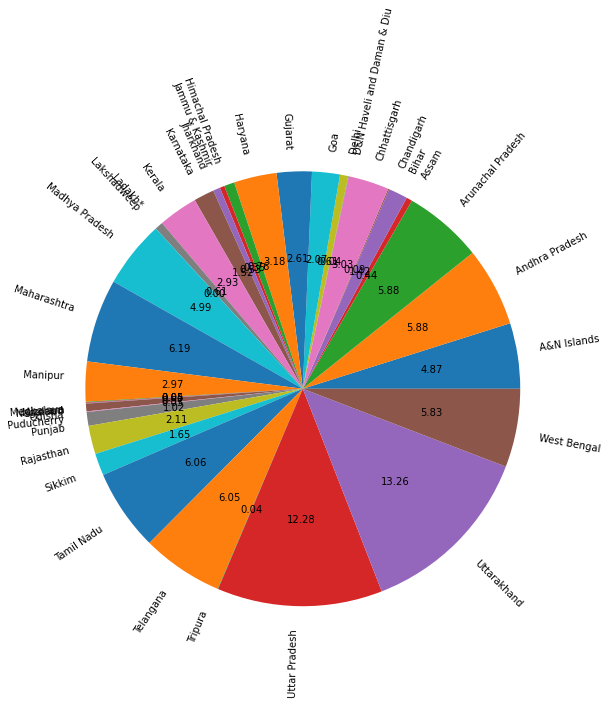

In [23]:
# 2001 Decade Analysis:

plt.figure (figsize = (10,10))
plt.pie(x=df2_states['Total Crime 2001 Decade'], labels=df2_states['State/UT'],autopct='%.2f', rotatelabels=True)
plt.show()

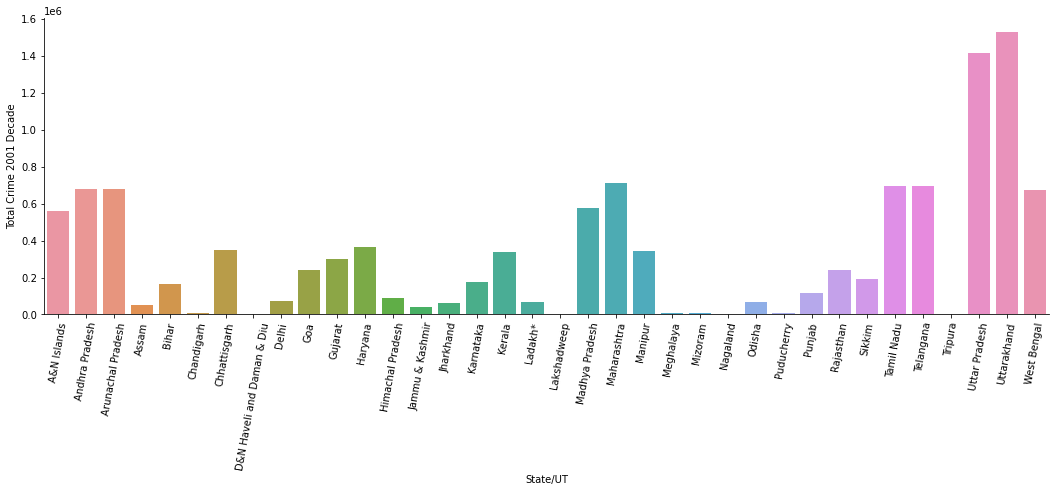

In [24]:
sns.catplot(x='State/UT',y='Total Crime 2001 Decade', data=df2_states,kind='bar',height=5, aspect=3)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.show()

As per analysis Uttarakhand has high crimes in 2001 decade.

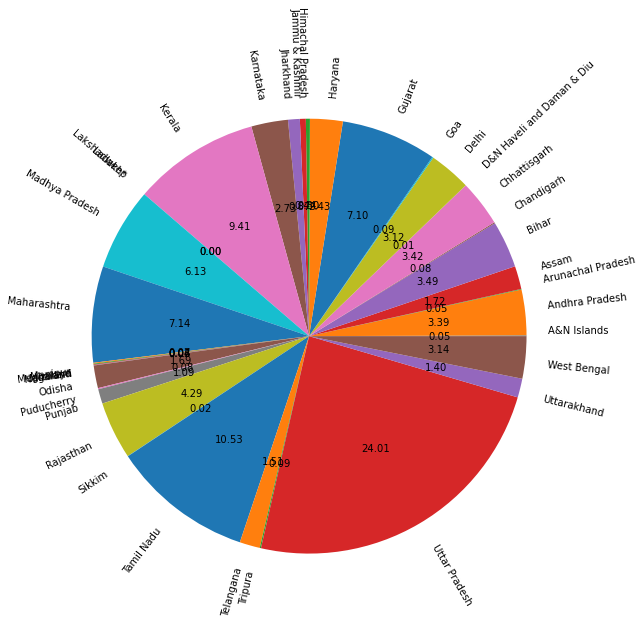

In [25]:
# 2011 Decade Analysis:

plt.figure (figsize = (10,10))
plt.pie(x=df2_states['Total Crime 2011 Decade'], labels=df2_states['State/UT'],autopct='%.2f', rotatelabels=True)
plt.show()

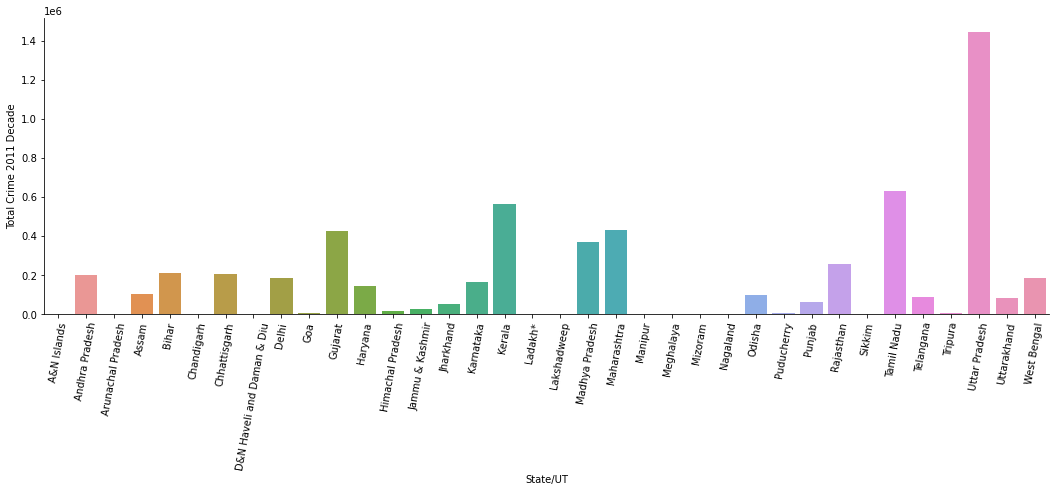

In [26]:
sns.catplot(x='State/UT',y='Total Crime 2011 Decade', data=df2_states,kind='bar',height=5, aspect=3)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.show()

As per Analysis Utter Pradesh has high crimes in 2011 decade.

In [27]:
df1.columns

Index(['Unnamed: 0', 'States/UT', 'Area (sq. km)', 'Literacy Rate 1951',
       'Literacy Rate 1961', 'Literacy Rate 1971', 'Literacy Rate 1981',
       'Literacy Rate 1991', 'Literacy Rate 2001', 'Literacy Rate 2011',
       'States & Union Territories', 'Literact Rate 2023',
       'Population (1951 Census)[11]', 'Population (1961 Census)[11]',
       'Population (1971 Census)[11]', 'Population (1981 Census)[11]',
       'Population (1991 Census)[11]', 'Population (2001 Census)[11]',
       'Population (2011 Census)[11]', 'Population 2023'],
      dtype='object')

In [28]:
df11 = df1.drop(columns=['Unnamed: 0', 'Literacy Rate 1951', 'Literacy Rate 1961', 'Literacy Rate 1971', 'Literacy Rate 1981',
       'Literacy Rate 1991', 'States & Union Territories', 'Population (1951 Census)[11]', 'Population (1961 Census)[11]',
       'Population (1971 Census)[11]', 'Population (1981 Census)[11]', 'Population (1991 Census)[11]'])
df11

,States/UT,Area (sq. km),Literacy Rate 2001,Literacy Rate 2011,Literact Rate 2023,Population (2001 Census)[11],Population (2011 Census)[11],Population 2023
0,Andaman & Nicobar,8249,81.30,86.63,86.27,356650.0,379944,403000
1,Andhra Pradesh,162968,60.47,67.02,66.40,75728400.0,49386799,53156000
2,Arunachal Pradesh,83743,54.34,65.38,66.95,1098328.0,1382611,1562000
3,Assam,78438,63.25,72.19,85.90,26638600.0,31169272,35713000
4,Bihar,94163,47.00,61.80,70.90,82879910.0,103804630,126756000
5,Chandigarh,114,81.94,86.05,86.43,901080.0,1054686,1231000
6,Chhattisgarh,135191,64.66,70.28,77.30,20834530.0,25540196,30180000
7,Dadra & Nagar Haveli and Daman & Diu,603,135.81,163.34,164.72,379043.0,585764,1263000
8,Delhi,1484,81.67,86.21,88.70,13851503.0,16753235,21359000
9,Goa,3702,82.01,88.70,87.40,1348900.0,1457723,1575000


In [29]:
df21 = pd.concat([df11,df2_states],axis=1)
df21

,States/UT,Area (sq. km),Literacy Rate 2001,Literacy Rate 2011,Literact Rate 2023,Population (2001 Census)[11],Population (2011 Census)[11],Population 2023,State/UT,Total Crime 2001 Decade,Crime% 2001 Decade,Total Crime 2011 Decade,Crime% 2011 Decade,Total Crime 2021 Decade
0,Andaman & Nicobar,8249,81.30,86.63,86.27,356650.0,379944,403000,A&N Islands,561012.6,9.725831,3179.9,0.052857,NaN
1,Andhra Pradesh,162968,60.47,67.02,66.40,75728400.0,49386799,53156000,Andhra Pradesh,677343.9,11.742574,203754.6,3.386845,NaN
2,Arunachal Pradesh,83743,54.34,65.38,66.95,1098328.0,1382611,1562000,Arunachal Pradesh,677710.2,11.748925,2760.7,0.045889,NaN
3,Assam,78438,63.25,72.19,85.90,26638600.0,31169272,35713000,Assam,50176.5,0.869870,103434.7,1.719310,NaN
4,Bihar,94163,47.00,61.80,70.90,82879910.0,103804630,126756000,Bihar,163477.6,2.834082,209850.4,3.488170,NaN
5,Chandigarh,114,81.94,86.05,86.43,901080.0,1054686,1231000,Chandigarh,10358.5,0.179577,4798.2,0.079757,NaN
6,Chhattisgarh,135191,64.66,70.28,77.30,20834530.0,25540196,30180000,Chhattisgarh,348550.8,6.042549,205733.6,3.419740,NaN
7,Dadra & Nagar Haveli and Daman & Diu,603,135.81,163.34,164.72,379043.0,585764,1263000,D&N Haveli and Daman & Diu,4845.9,0.084010,606.0,0.010073,NaN
8,Delhi,1484,81.67,86.21,88.70,13851503.0,16753235,21359000,Delhi,70489.0,1.222012,187853.1,3.122527,NaN
9,Goa,3702,82.01,88.70,87.40,1348900.0,1457723,1575000,Goa,238465.4,4.134086,5138.5,0.085413,NaN


# * Req_1 : Analysis of Literacy Rate vs Total Crimes *

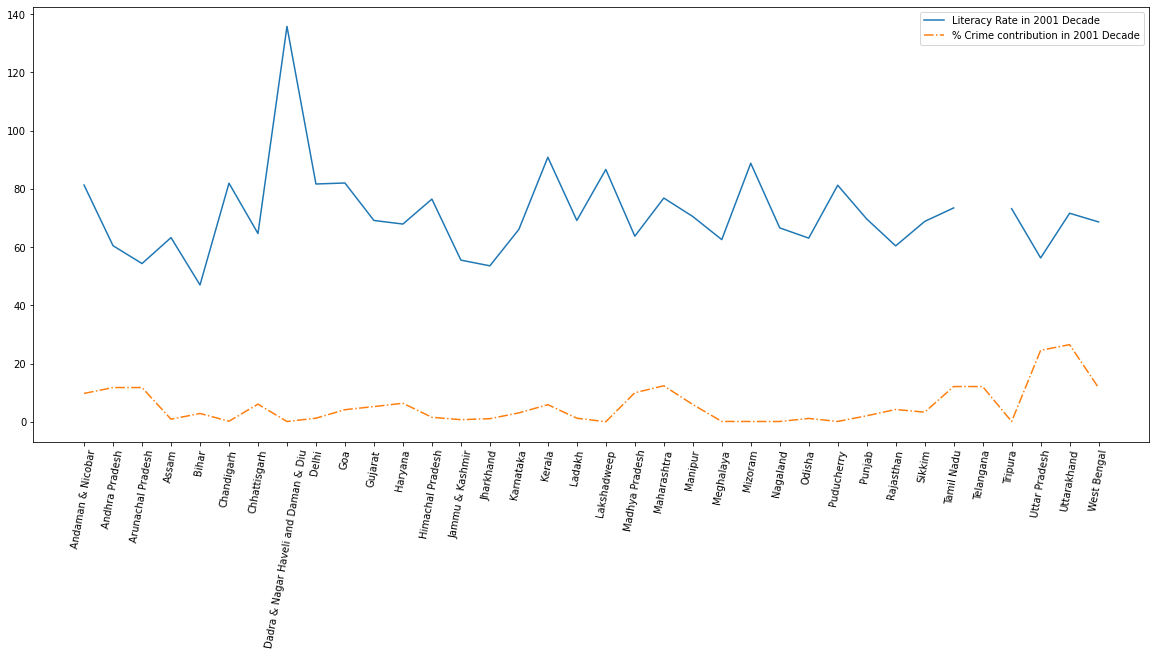

In [30]:
plt.figure(figsize=(20,8))

plt.plot(df21['States/UT'], df21['Literacy Rate 2001'], label = "Literacy Rate in 2001 Decade")
plt.plot(df21['States/UT'], df21['Crime% 2001 Decade'],'-.', label = "% Crime contribution in 2001 Decade")

locs, labels = plt.xticks()
plt.setp(labels, rotation=80)

plt.legend()
plt.show()

As per observation, Total Crime or Crime% is +ve correlated with Literacy rate, in 2001 decade, 
Means many states having with high literacy rate and high crime% or total crimes.

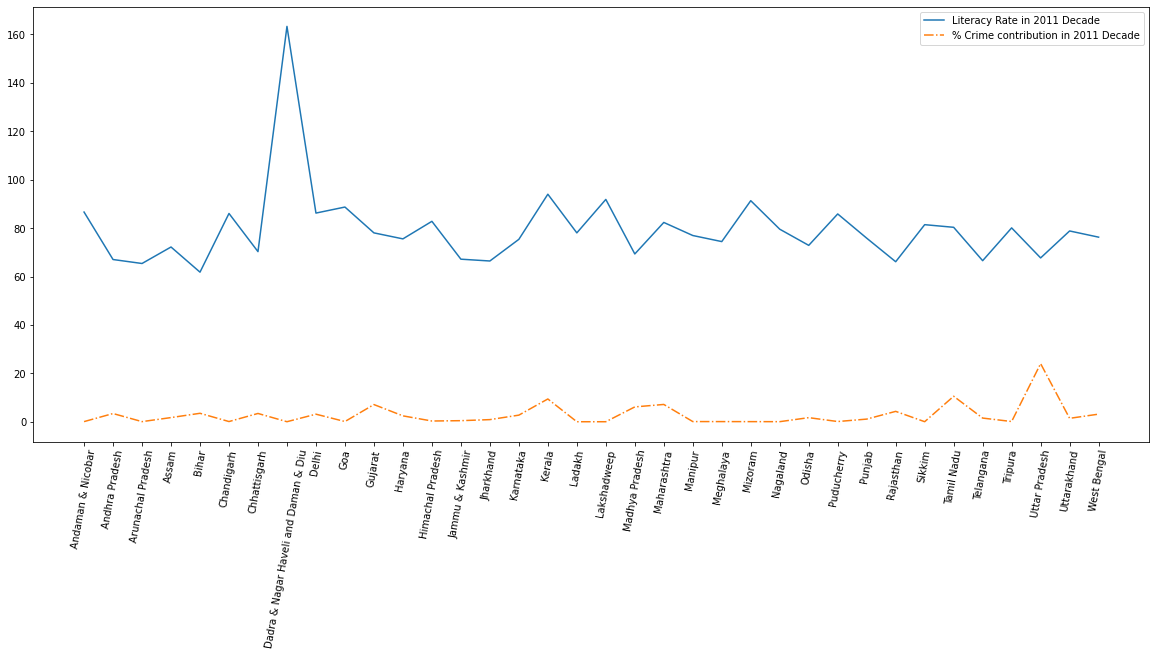

In [31]:
plt.figure(figsize=(20,8))

plt.plot(df21['States/UT'], df21['Literacy Rate 2011'], label = "Literacy Rate in 2011 Decade")
plt.plot(df21['States/UT'], df21['Crime% 2011 Decade'],'-.', label = "% Crime contribution in 2011 Decade")

locs, labels = plt.xticks()
plt.setp(labels, rotation=80)

plt.legend()
plt.show()

As per observation, Total Crime or Crime% is not such correlate with Literacy rate, in 2011 decade.
The total crimes or crime% was average if state literacy rate is high or low, except few states. 

# * Req_2 : Analysis of the type of crime vs each state vs Literacy rate. *

In [70]:
## Featch Data from India_Area_LiteracyRate_Population.csv generated in Phase-1

crime_type_data = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
crime_type_data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,30.0,1131.0,16.0,149.0,34.0,175.0,0.0,181.0,1518.0,4154.0
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,69.0,1543.0,7.0,118.0,24.0,154.0,0.0,270.0,754.0,4125.0
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,38.0,2088.0,14.0,112.0,83.0,186.0,0.0,404.0,1262.0,5818.0
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,23.0,795.0,17.0,126.0,38.0,57.0,0.0,233.0,1181.0,3140.0
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,41.0,1244.0,12.0,109.0,58.0,247.0,0.0,431.0,2313.0,6507.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9014,PUDUCHERRY,KARAIKAL,2012.0,5.0,6.0,2.0,6.0,0.0,6.0,2.0,...,1.0,186.0,0.0,2.0,0.0,1.0,0.0,44.0,392.0,787.0
9015,PUDUCHERRY,PUDUCHERRY,2012.0,24.0,21.0,10.0,7.0,0.0,7.0,17.0,...,20.0,632.0,0.0,7.0,2.0,5.0,0.0,219.0,1668.0,3494.0
9016,PUDUCHERRY,TOTAL,2012.0,29.0,27.0,12.0,13.0,0.0,13.0,19.0,...,21.0,818.0,0.0,9.0,2.0,6.0,0.0,263.0,2060.0,4281.0
9017,LADAKH,TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
crime_type_df= crime_type_data.loc[crime_type_data.DISTRICT == 'TOTAL']
crime_type_df.sort_values(by='STATE/UT',inplace=True)
crime_type_df.drop(columns = 'YEAR', inplace = True)
crime_type_2001_decade = crime_type_df.groupby('STATE/UT').sum()

crime_type_2001_decade.reset_index()

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,160.0,65.0,21.0,109.0,0.0,109.0,94.0,77.0,17.0,...,98.0,1105.0,6.0,214.0,43.0,121.0,0.0,42.0,4443.0,9102.0
1,ANDHRA PRADESH,31756.0,22420.0,1763.0,13479.0,2.0,13477.0,21239.0,14936.0,6303.0,...,11968.0,546565.0,6215.0,51999.0,36131.0,119007.0,17.0,138435.0,482252.0,2018981.0
2,ARUNACHAL PRADESH,841.0,417.0,36.0,500.0,0.0,500.0,857.0,558.0,299.0,...,250.0,5157.0,2.0,784.0,18.0,167.0,0.0,745.0,7396.0,27652.0
3,ASSAM,15432.0,5662.0,718.0,16178.0,5.0,16173.0,27939.0,22920.0,5019.0,...,7918.0,69183.0,1276.0,13620.0,112.0,39388.0,8.0,30205.0,181354.0,597764.0
4,BIHAR,41245.0,40919.0,3672.0,13124.0,2.0,13122.0,37220.0,19389.0,17831.0,...,8509.0,189266.0,13548.0,7576.0,226.0,25680.0,440.0,44442.0,538591.0,1346293.0
5,CHANDIGARH,243.0,301.0,79.0,281.0,0.0,281.0,640.0,534.0,106.0,...,62.0,816.0,42.0,314.0,143.0,807.0,0.0,98.0,11605.0,40807.0
6,CHHATTISGARH,12060.0,7910.0,348.0,11838.0,0.0,11838.0,3345.0,2630.0,715.0,...,3147.0,85026.0,1142.0,19165.0,1725.0,9573.0,5.0,25432.0,245855.0,561027.0
7,D & N HAVELI,108.0,31.0,3.0,56.0,0.0,56.0,141.0,94.0,47.0,...,55.0,318.0,1.0,50.0,4.0,38.0,0.0,148.0,1859.0,4651.0
8,DAMAN & DIU,68.0,38.0,2.0,20.0,0.0,20.0,31.0,15.0,16.0,...,34.0,190.0,3.0,15.0,2.0,35.0,0.0,311.0,661.0,2948.0
9,DELHI UT,547.0,510.0,63.0,381.0,0.0,381.0,1627.0,964.0,663.0,...,50.0,2011.0,113.0,502.0,90.0,138.0,0.0,432.0,22000.0,54384.0


In [72]:
crime_type_2001_decade.iloc[7] = crime_type_2001_decade.iloc[7:9].sum()  # As Dadra Nagar Haveli and Daman & Diu consider one UT in other dataset.
crime_type_2001_decade = crime_type_2001_decade.drop(crime_type_2001_decade.index[7]) # Not required.

crime_type_2001_decade.sort_values(by=['STATE/UT'],inplace=True) # Sorted A to Z
crime_type_2001_decade.reset_index(inplace=True,drop=True)

In [73]:
crime_type_2001_decade.to_csv('Crime_Type_2001_Decade.csv')

In [80]:
Crime_df = pd.read_excel('Crime_Type_2001Decade.xlsx')
Crime_df

,STATE/UT,MURDER,RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,...,MURDER%,RAPE%,KIDNAPPING & ABDUCTION%,KIDNAPPING AND ABDUCTION OF OTHERS%,DACOITY%,ROBBERY%,BURGLARY%,THEFT%,RIOTS%,CHEATING%
0,A&N Islands,160,109,94,17,15,74,892,1124,140,...,0.040325,0.046773,0.028206,0.020206,0.025408,0.030528,0.081355,0.034190,0.018092,0.034029
1,Andhra Pradesh,31756,13479,21239,6303,1987,7605,97336,287190,27459,...,8.003488,5.784035,6.373102,7.491710,3.365743,3.137376,8.877579,8.735852,3.548426,13.294624
2,Arunachal Pradesh,841,500,857,299,260,843,2780,5178,340,...,0.211958,0.214557,0.257157,0.355390,0.440409,0.347772,0.253551,0.157506,0.043937,0.069941
3,Assam,15432,16178,27939,5019,4170,7467,34752,85475,34963,...,3.889338,6.942215,8.383544,5.965555,7.063487,3.080446,3.169574,2.600010,4.518141,1.666620
4,Bihar,41245,13124,37220,17831,11099,23666,40293,153372,105096,...,10.395008,5.631700,11.168457,21.193824,18.800393,9.763201,3.674944,4.665326,13.581172,4.127880
5,Chandigarh,243,281,640,106,31,397,2947,18474,755,...,0.061243,0.120581,0.192042,0.125991,0.052510,0.163779,0.268783,0.561949,0.097566,0.309490
6,Chhattisgarh,12060,11838,3345,715,1468,5113,44656,62873,10897,...,3.039491,5.079858,1.003721,0.849845,2.486618,2.109323,4.072873,1.912494,1.408180,0.941248
7,D&N Haveli and Daman & Diu,68,20,31,16,34,23,480,564,266,...,0.017138,0.008582,0.009302,0.019018,0.057592,0.009488,0.043779,0.017156,0.034374,0.009819
8,Delhi,547,381,1627,663,48,624,3029,19276,165,...,0.137861,0.163493,0.488207,0.788038,0.081306,0.257426,0.276261,0.586345,0.021322,0.293619
9,Goa,487,350,236,72,55,298,3700,8045,813,...,0.122739,0.150190,0.070816,0.085579,0.093163,0.122937,0.337460,0.244716,0.105061,0.158175


## Analysis of MURDER% of each States/UT Vs Literacy Rate

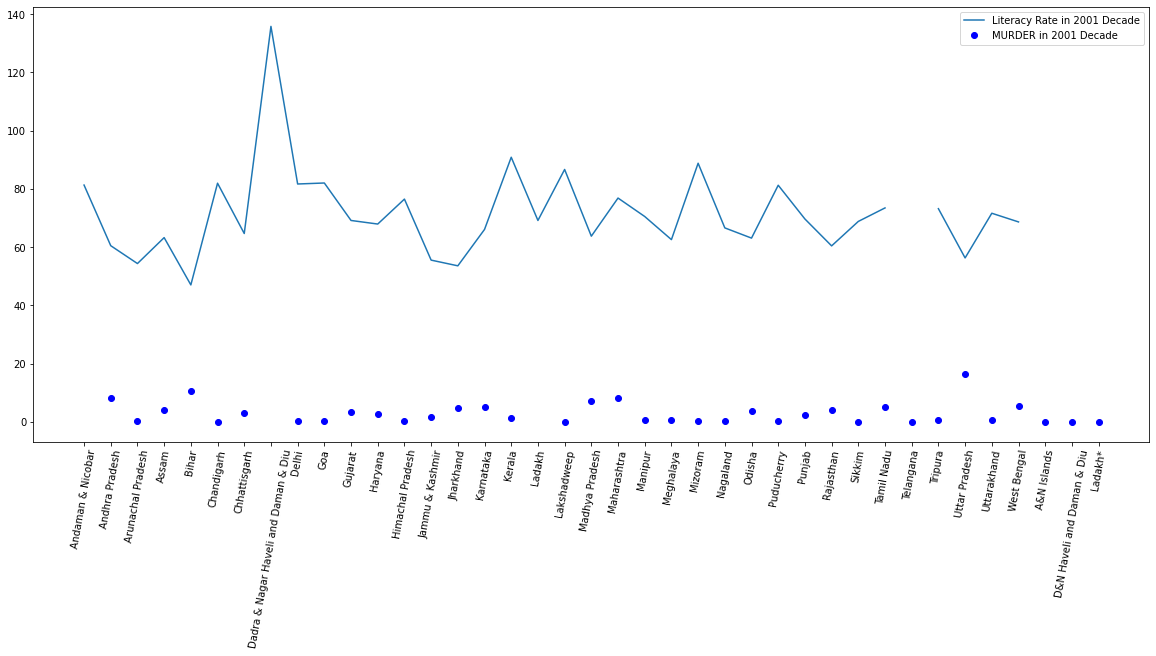

In [104]:
plt.figure(figsize=(20,8))

plt.plot(df21['States/UT'], df21['Literacy Rate 2001'], label = "Literacy Rate in 2001 Decade")
plt.plot(Crime_df['STATE/UT'], Crime_df['MURDER%'],'bo', label = "MURDER in 2001 Decade")

locs, labels = plt.xticks()
plt.setp(labels, rotation=80)

plt.legend()
plt.show()

## Analysis of RAPE% of each States/UT Vs Literacy Rate

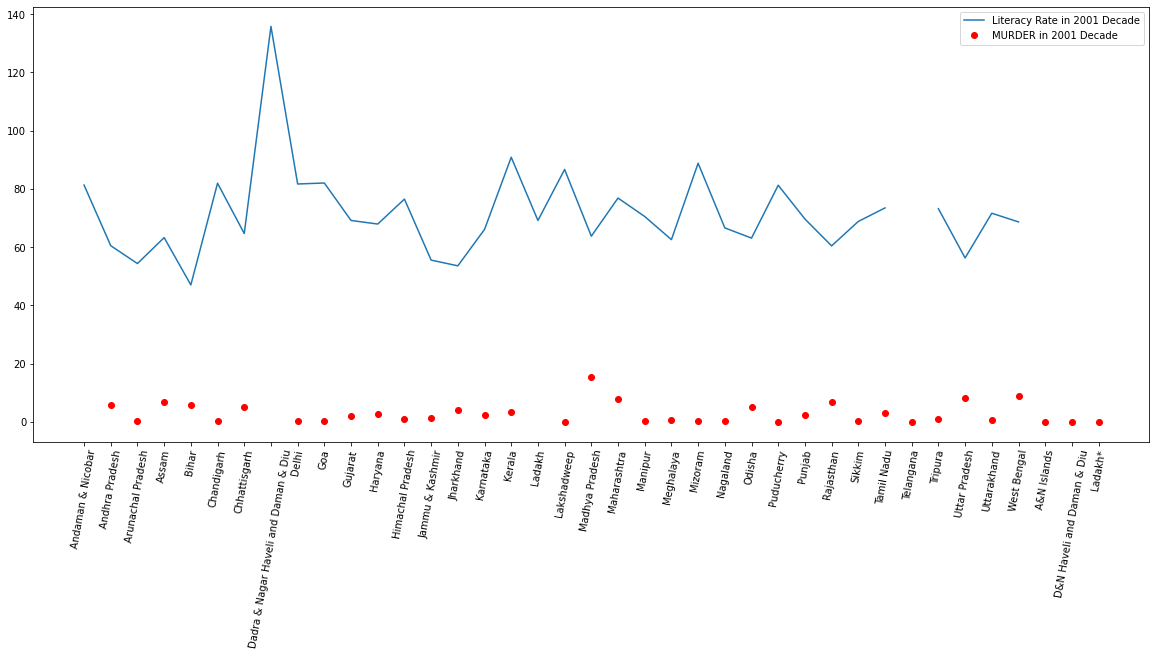

In [105]:
plt.figure(figsize=(20,8))

plt.plot(df21['States/UT'], df21['Literacy Rate 2001'], label = "Literacy Rate in 2001 Decade")
plt.plot(Crime_df['STATE/UT'], Crime_df['RAPE%'],'or', label = "MURDER in 2001 Decade")

locs, labels = plt.xticks()
plt.setp(labels, rotation=80)

plt.legend()
plt.show()

## Analysis of KIDNAPPING & ABDUCTION% of each States/UT Vs Literacy Rate

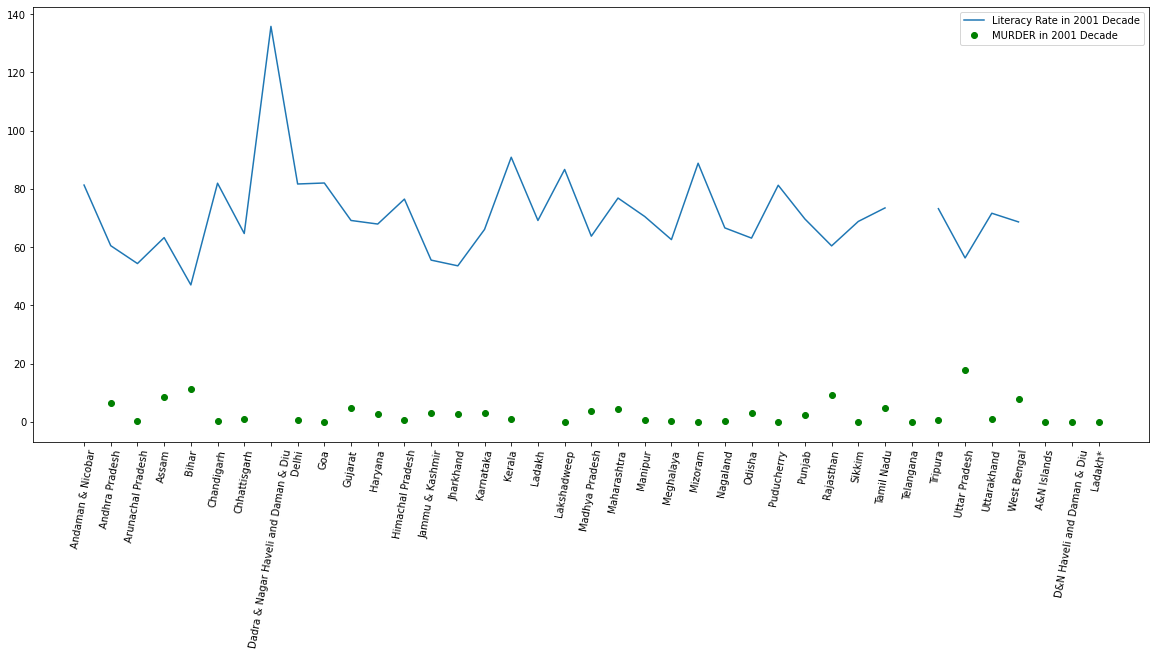

In [106]:
plt.figure(figsize=(20,8))

plt.plot(df21['States/UT'], df21['Literacy Rate 2001'], label = "Literacy Rate in 2001 Decade")
plt.plot(Crime_df['STATE/UT'], Crime_df['KIDNAPPING & ABDUCTION%'],'og', label = "MURDER in 2001 Decade")

locs, labels = plt.xticks()
plt.setp(labels, rotation=80)

plt.legend()
plt.show()

## Analysis of DACOITY% of each States/UT Vs Literacy Rate

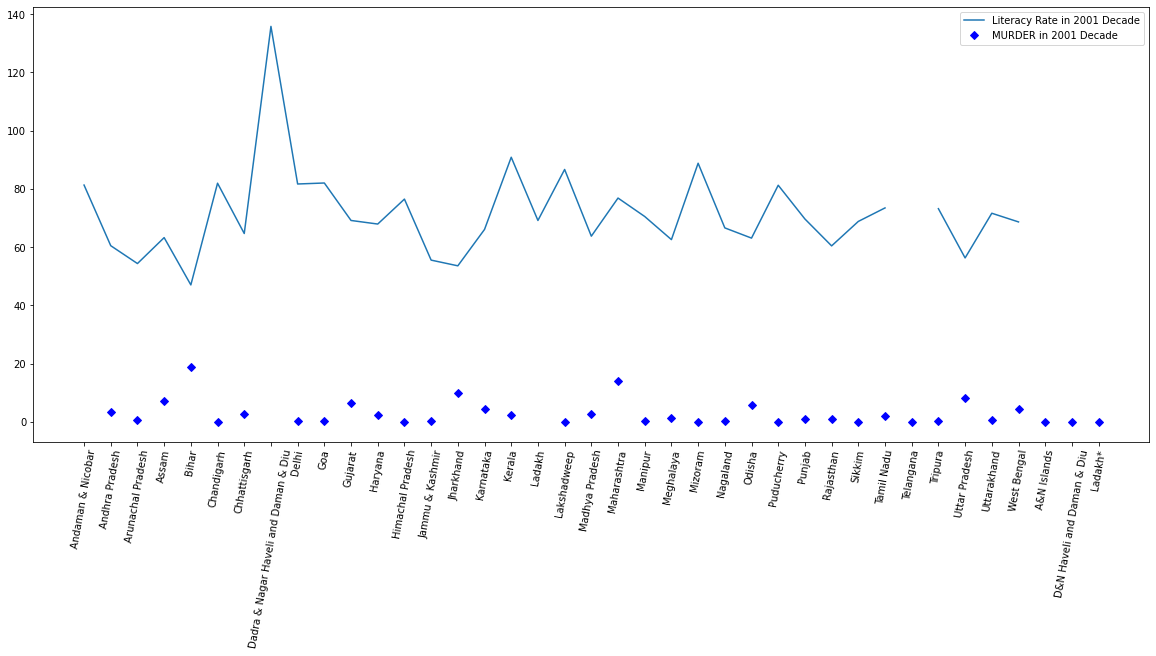

In [107]:
plt.figure(figsize=(20,8))

plt.plot(df21['States/UT'], df21['Literacy Rate 2001'], label = "Literacy Rate in 2001 Decade")
plt.plot(Crime_df['STATE/UT'], Crime_df['DACOITY%'],'bD', label = "MURDER in 2001 Decade")

locs, labels = plt.xticks()
plt.setp(labels, rotation=80)

plt.legend()
plt.show()

## Analysis of ROBBERY% of each States/UT Vs Literacy Rate

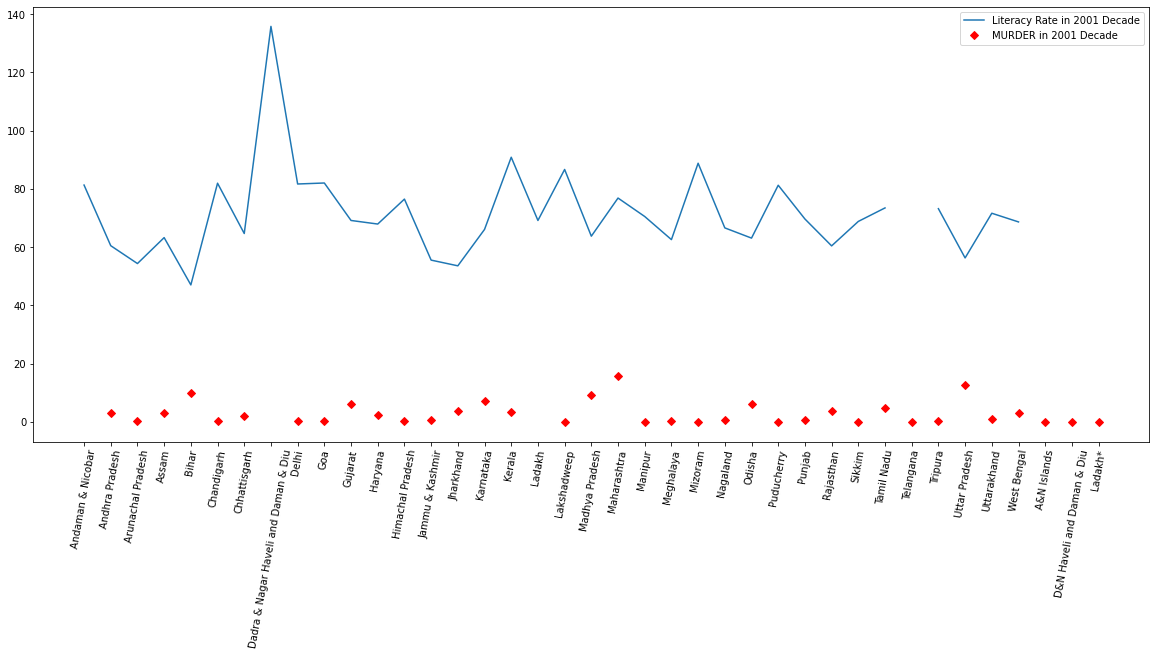

In [108]:
plt.figure(figsize=(20,8))

plt.plot(df21['States/UT'], df21['Literacy Rate 2001'], label = "Literacy Rate in 2001 Decade")
plt.plot(Crime_df['STATE/UT'], Crime_df['ROBBERY%'],'rD', label = "MURDER in 2001 Decade")

locs, labels = plt.xticks()
plt.setp(labels, rotation=80)

plt.legend()
plt.show()

## Analysis of BURGLARY% of each States/UT Vs Literacy Rate

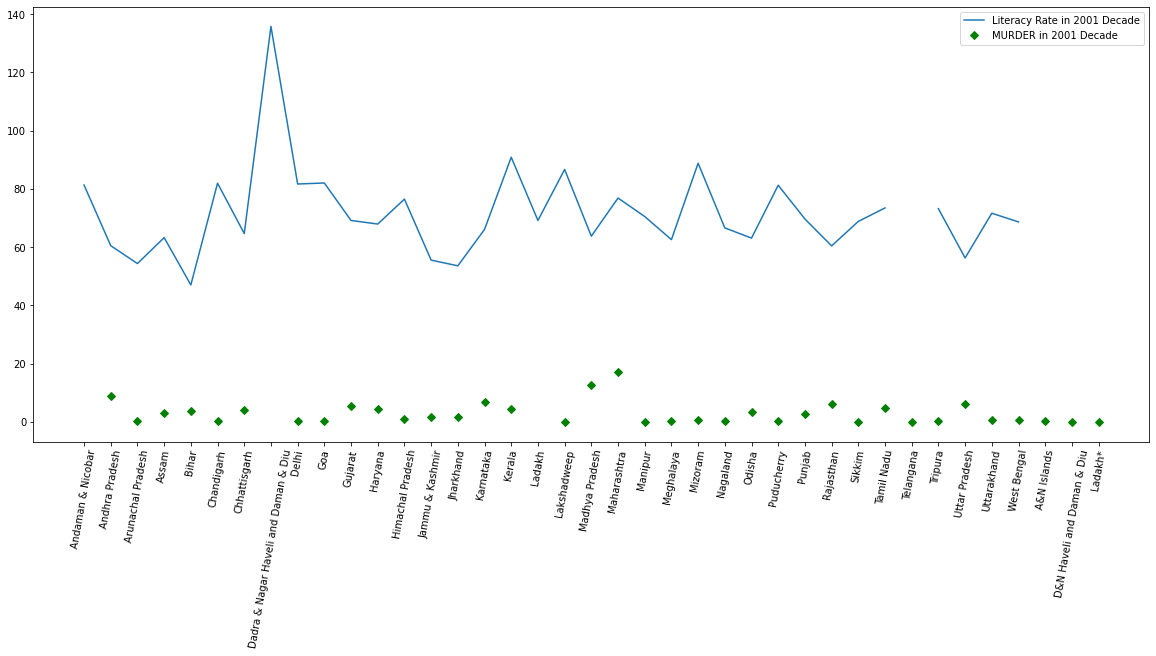

In [109]:
plt.figure(figsize=(20,8))

plt.plot(df21['States/UT'], df21['Literacy Rate 2001'], label = "Literacy Rate in 2001 Decade")
plt.plot(Crime_df['STATE/UT'], Crime_df['BURGLARY%'],'gD', label = "MURDER in 2001 Decade")

locs, labels = plt.xticks()
plt.setp(labels, rotation=80)

plt.legend()
plt.show()

## Analysis of THEFT% of each States/UT Vs Literacy Rate

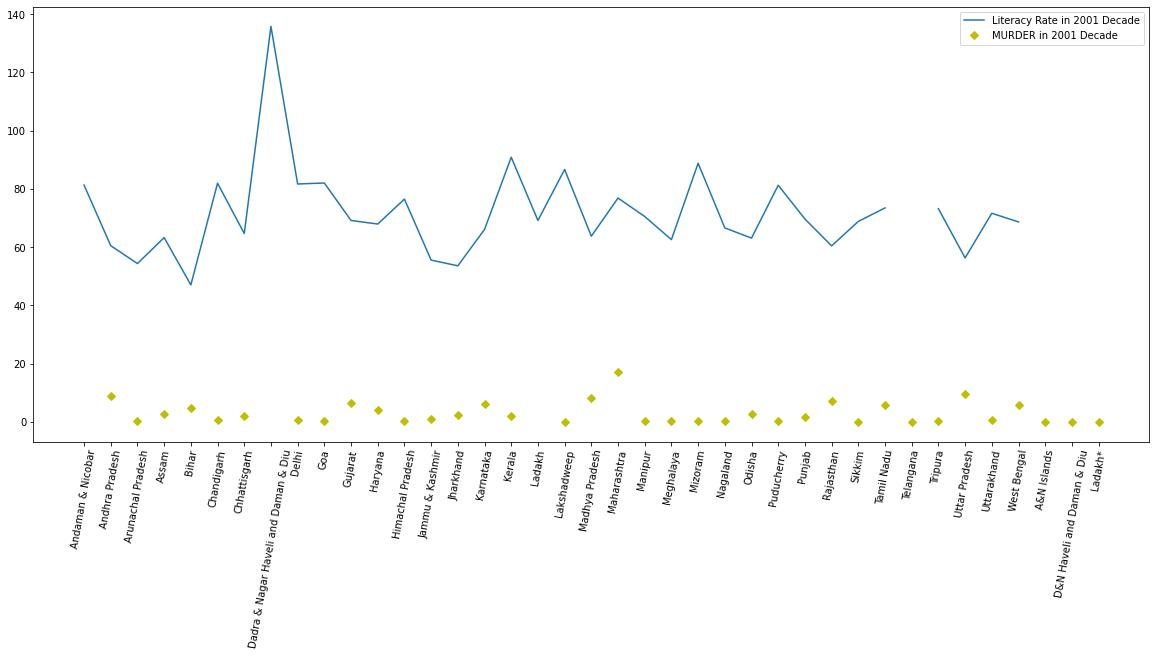

In [110]:
plt.figure(figsize=(20,8))

plt.plot(df21['States/UT'], df21['Literacy Rate 2001'], label = "Literacy Rate in 2001 Decade")
plt.plot(Crime_df['STATE/UT'], Crime_df['THEFT%'],'yD', label = "MURDER in 2001 Decade")

locs, labels = plt.xticks()
plt.setp(labels, rotation=80)

plt.legend()
plt.show()

## Analysis of RIOTS% of each States/UT Vs Literacy Rate

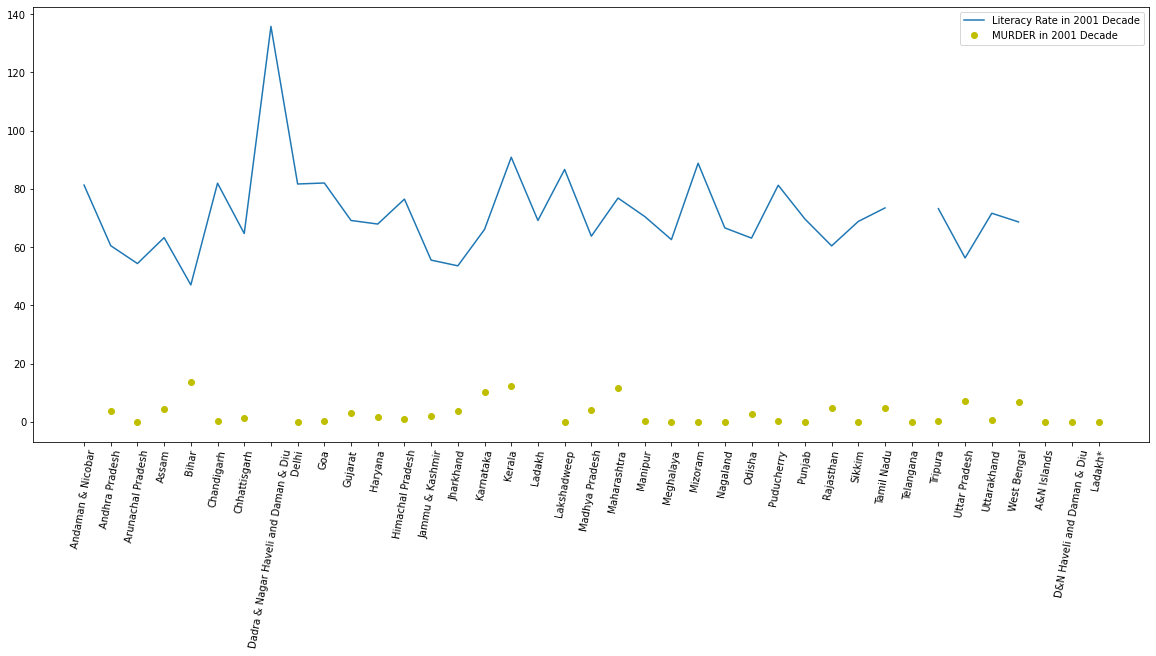

In [111]:
plt.figure(figsize=(20,8))

plt.plot(df21['States/UT'], df21['Literacy Rate 2001'], label = "Literacy Rate in 2001 Decade")
plt.plot(Crime_df['STATE/UT'], Crime_df['RIOTS%'],'yo', label = "MURDER in 2001 Decade")

locs, labels = plt.xticks()
plt.setp(labels, rotation=80)

plt.legend()
plt.show()

## Analysis of CHEATING% of each States/UT Vs Literacy Rate

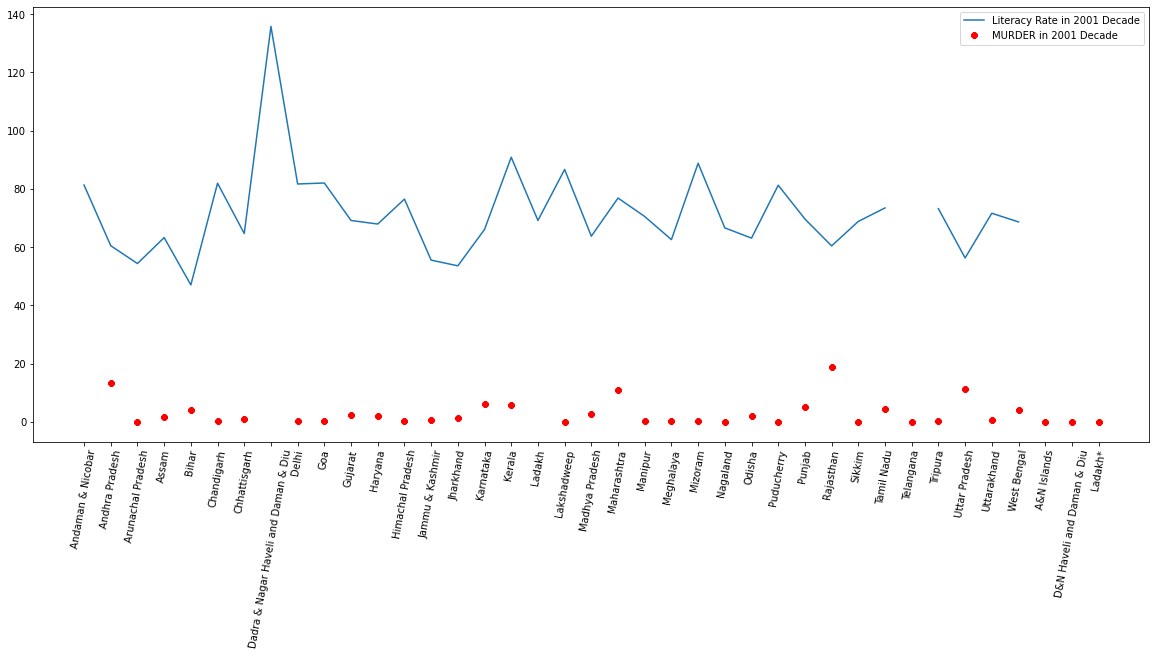

In [112]:
plt.figure(figsize=(20,8))

plt.plot(df21['States/UT'], df21['Literacy Rate 2001'], label = "Literacy Rate in 2001 Decade")
plt.plot(Crime_df['STATE/UT'], Crime_df['CHEATING%'],'r8', label = "MURDER in 2001 Decade")

locs, labels = plt.xticks()
plt.setp(labels, rotation=80)

plt.legend()
plt.show()

# * Req_3 : Analysis of year-on-year total crime rate *

Indian Crime Rate from Year 2001 to 2021.

Ref.- https://ncrb.gov.in/en/crime-in-india-table-addtional-table-and-chapter-contents

In [17]:
df3 = pd.read_excel(r"C:\Users\NEHA DESAI\Total Crime Data Year Wise.xlsx", sheet_name='Sheet2')
df3

,Year,Indian Crime Rate
0,2001,520.4
1,2002,526.5
2,2003,514.4
3,2004,555.3
4,2005,455.8
5,2006,455.7
6,2007,504.5
7,2008,515.0
8,2009,570.8
9,2010,569.3


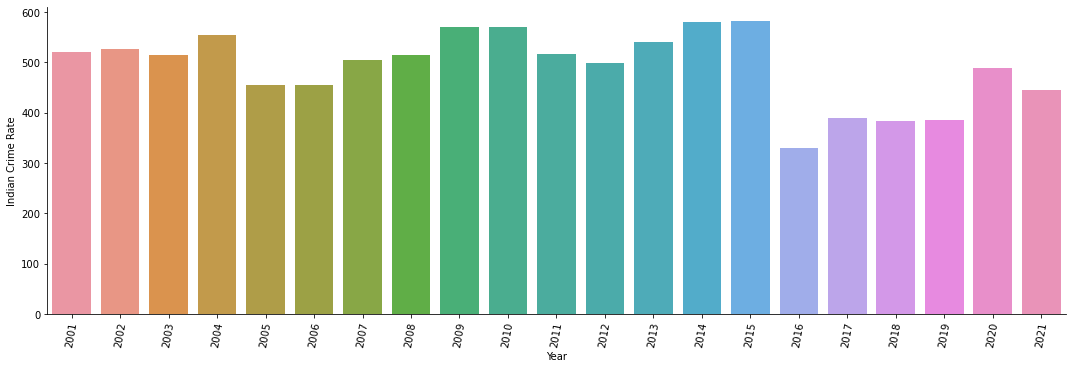

In [18]:
sns.catplot(x='Year',y='Indian Crime Rate', data=df3,kind='bar',height=5, aspect=3)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.show()

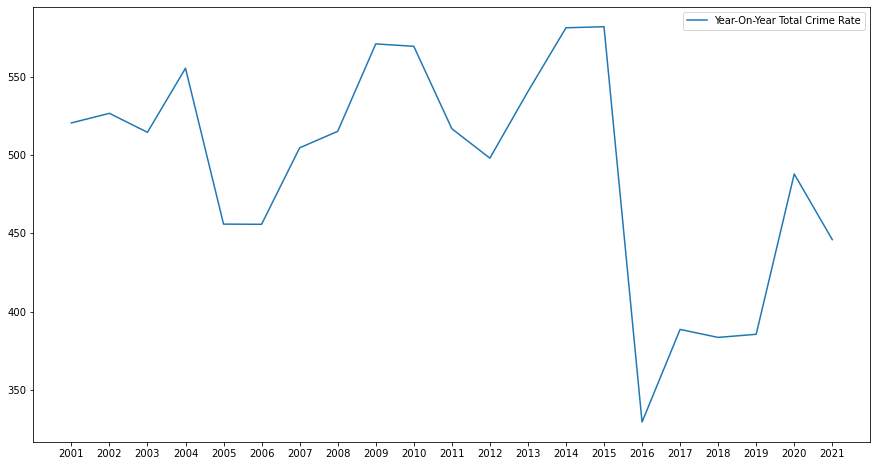

In [19]:
plt.figure(figsize=(15,8))

plt.plot( df3['Year'], df3['Indian Crime Rate'], label = "Year-On-Year Total Crime Rate")
plt.xticks(df3.Year)
plt.legend()
plt.show()

As per Above observation:
1. The Crime Rate is high at years 2004, 2009, 2010, 2014 & 2015.
2. In year 2016 the Crime Rate is low.
3. From 2001 to 2015 , the Crime Rate is above 450, except 2020 year.
4. The Crime Rate is calculated on Population, As we know the population is growing year by year, that is way we can see the Crime Rate below 450.

# * Req_4 :  Analysis of area vs overall crime *

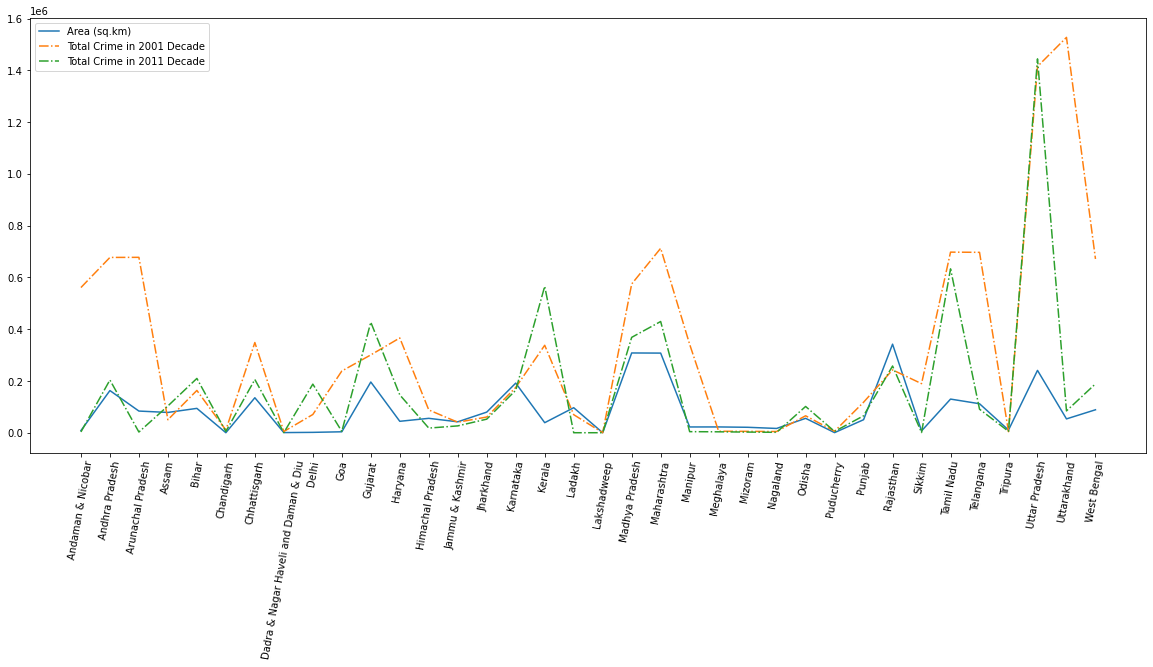

In [22]:
plt.figure(figsize=(20,8))

plt.plot(df21['States/UT'], df21['Area (sq. km)'], label = "Area (sq.km)")
plt.plot(df21['States/UT'], df21['Total Crime 2001 Decade'],'-.', label = "Total Crime in 2001 Decade")
plt.plot(df21['States/UT'], df21['Total Crime 2011 Decade'],'-.', label = "Total Crime in 2011 Decade")


locs, labels = plt.xticks()
plt.setp(labels, rotation=80)

plt.legend()
plt.show()

As per above observation, 
1. The total Crimes occured in 2001 decade were more comapred to 2011 decade.
2. The Uttar Pradesh had more total no. of crimes in both 2001 and 2011 decade, but Uttarakhand had more crimes in 2001 decade,
    but less in 2011 decade.

# * Req_5 :  Analysis of Population vs overall Crime *

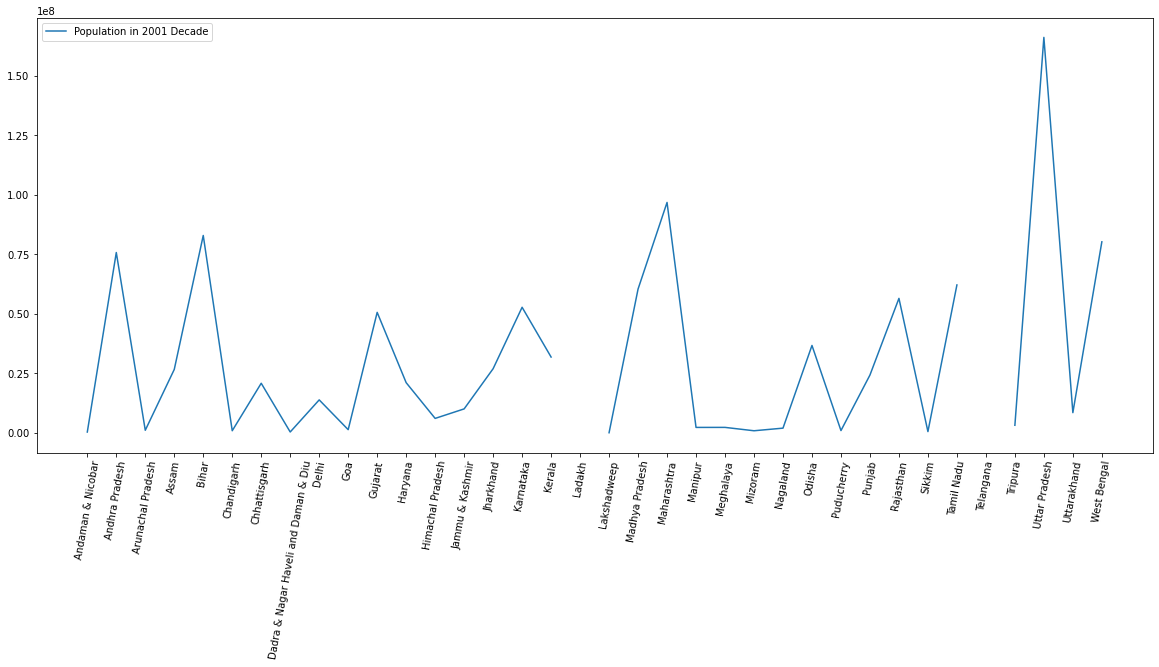

In [30]:
plt.figure(figsize=(20,8))

plt.plot(df21['States/UT'], df21['Population (2001 Census)[11]'], label = "Population in 2001 Decade")

locs, labels = plt.xticks()
plt.setp(labels, rotation=80)

plt.legend()
plt.show()

<Figure size 1440x576 with 0 Axes>

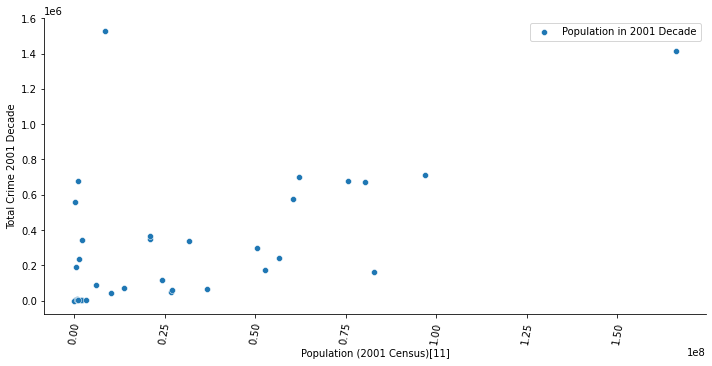

In [28]:
plt.figure(figsize=(20,8))

sns.relplot(df21['Population (2001 Census)[11]'], df21['Total Crime 2001 Decade'] , label = "Population in 2001 Decade", height=5, aspect=2)

locs, labels = plt.xticks()
plt.setp(labels, rotation=80)

plt.legend()
plt.show()

As per observation, In 2001 Decade Total Crime is not high +ve related with Population, means most of the states having low or modarate population with good number of total crimes. 

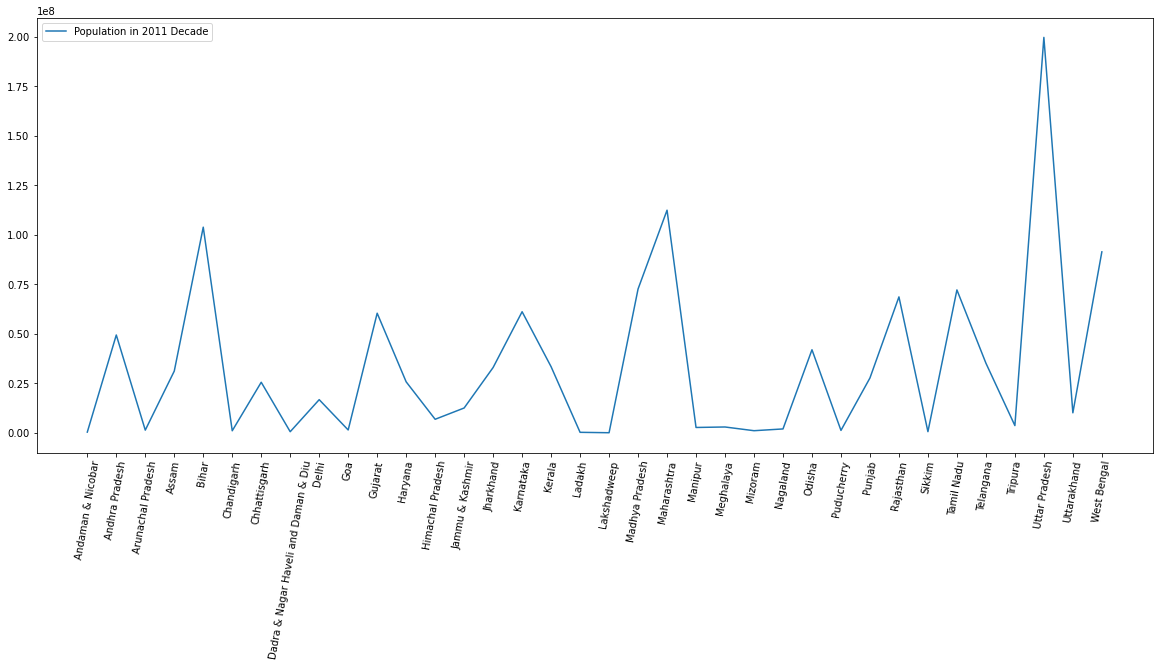

In [31]:
plt.figure(figsize=(20,8))

plt.plot(df21['States/UT'], df21['Population (2011 Census)[11]'], label = "Population in 2011 Decade")

locs, labels = plt.xticks()
plt.setp(labels, rotation=80)

plt.legend()
plt.show()

<Figure size 1440x576 with 0 Axes>

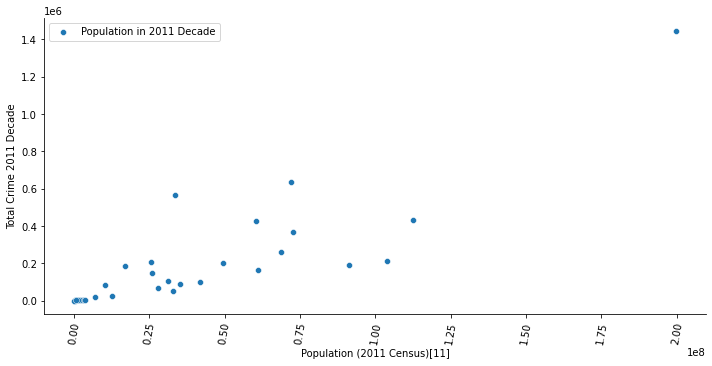

In [32]:
plt.figure(figsize=(20,8))

sns.relplot(df21['Population (2011 Census)[11]'], df21['Total Crime 2011 Decade'] , label = "Population in 2011 Decade", height=5, aspect=2)

locs, labels = plt.xticks()
plt.setp(labels, rotation=80)

plt.legend()
plt.show()

As per observation, In 2011 Decade Total Crime is +ve correlated with Population,
means with increase in population , total crimes also increases. 